In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/reena/Desktop/Salary_Prediction/data/cleaned/final_data.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,Company,State,In-HQ_State,Company Age,Python,R,Spark,AWS,Excel
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,48,1,0,0,0,1
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,37,1,0,0,0,0
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,11,1,0,1,0,1
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,56,1,0,0,0,0
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,23,1,0,0,0,1


In [3]:
def short_title(title):
    if 'data scientist' in title.lower():
        return 'DS'
    elif 'data engineer' in title.lower():
        return 'DE'
    elif 'analyst' in title.lower():
        return 'DA'
    elif 'machine learning' in title.lower():
        return 'MLE'
    elif 'manager' in title.lower():
        return 'DM'
    elif 'director' in title.lower():
        return 'DD'
    else:
        return 'na'

In [4]:
def job_level(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'junior'
    else:
        return 'na'

In [5]:
df['Job Type'] = df['Job Title'].apply(short_title)

In [6]:
df['Job Type'].value_counts()

DS     279
na     184
DE     119
DA     102
MLE     22
DM      22
DD      14
Name: Job Type, dtype: int64

In [7]:
df['Job Level'] = df['Job Title'].apply(job_level)
df['Job Level'].value_counts()

na        520
senior    220
junior      2
Name: Job Level, dtype: int64

In [8]:
df['State']= df.State.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.State.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
CO     11
DC     11
UT     10
WI     10
IN     10
MO      9
AZ      9
AL      8
GA      6
KY      6
MI      6
DE      6
CT      5
IA      5
NE      4
OR      4
LA      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: State, dtype: int64

In [9]:
df['Jobdesc_len'] = df['Job Description'].apply(lambda x: len(x))
df['Jobdesc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: Jobdesc_len, Length: 742, dtype: int64

In [10]:
df['Competitors_count'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['Competitors_count']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: Competitors_count, Length: 742, dtype: int64

In [11]:
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [12]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [13]:
df['Company'] = df.Company.apply(lambda x: x.replace('\n', ''))
df.Company

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: Company, Length: 742, dtype: object

In [14]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,In-HQ_State,Company Age,Python,R,Spark,AWS,Excel,Jobdesc_len,Competitors_count
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,47.524259,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.839080,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,25.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,60.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [15]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company', 'State', 'In-HQ_State', 'Company Age', 'Python', 'R',
       'Spark', 'AWS', 'Excel', 'Job Type', 'Job Level', 'Jobdesc_len',
       'Competitors_count'],
      dtype='object')

In [17]:
model_df = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','Competitors_count','hourly','employer_provided',
             'State','In-HQ_State','Company Age','Python','Spark','AWS','Excel','Job Type','Job Level','Jobdesc_len']]

In [18]:
df_extd = pd.get_dummies(model_df)

In [19]:
df_extd.to_csv('C:/Users/reena/Desktop/Salary_Prediction/data/eda/eda_data.csv',index=False)

<AxesSubplot:>

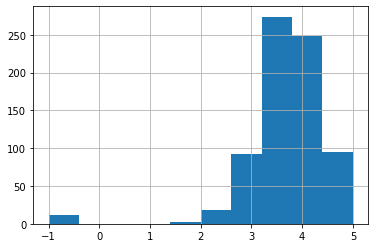

In [17]:
df.Rating.hist()

<AxesSubplot:>

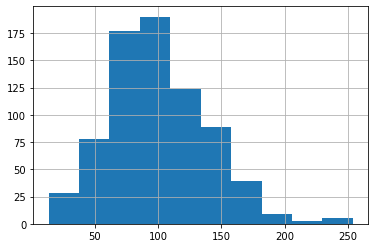

In [18]:
df.avg_salary.hist()

<AxesSubplot:>

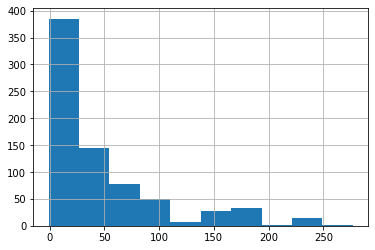

In [19]:
df['Company Age'].hist()

<AxesSubplot:>

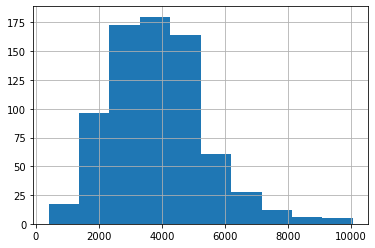

In [20]:
df.Jobdesc_len.hist()

<AxesSubplot:>

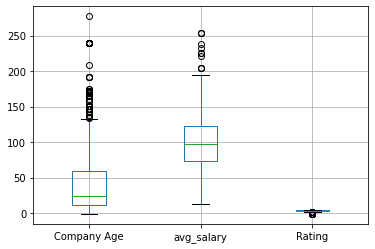

In [21]:
df.boxplot(column = ['Company Age','avg_salary','Rating'])

<AxesSubplot:>

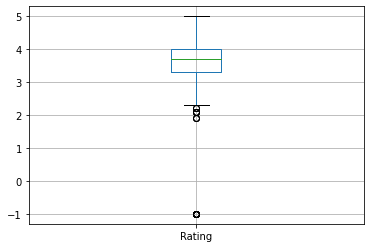

In [22]:
df.boxplot(column = 'Rating')

In [23]:
df[['Company Age','avg_salary','Rating','Jobdesc_len']].corr()

,Company Age,avg_salary,Rating,Jobdesc_len
Company Age,1.000000,0.019574,0.023162,0.164188
avg_salary,0.019574,1.000000,0.013492,0.078808
Rating,0.023162,0.013492,1.000000,-0.012281
Jobdesc_len,0.164188,0.078808,-0.012281,1.000000


<AxesSubplot:>

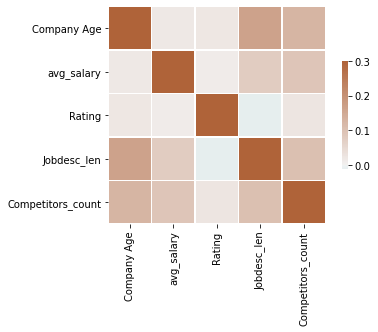

In [31]:
Corr_map = sns.diverging_palette(200, 30, as_cmap=True)
sns.heatmap(df[['Company Age','avg_salary','Rating','Jobdesc_len','Competitors_count']].corr(),vmax=.3, center=0, cmap=Corr_map,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [32]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company', 'State', 'In-HQ_State', 'Company Age', 'Python', 'R',
       'Spark', 'AWS', 'Excel', 'Job Type', 'Job Level', 'Jobdesc_len',
       'Competitors_count'],
      dtype='object')

In [37]:
df_categorical = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 
             'Company', 'State','In-HQ_State', 'Python', 'R','Spark', 'AWS', 'Excel', 'Job Type','Job Level']]

graph for Location: total = 200


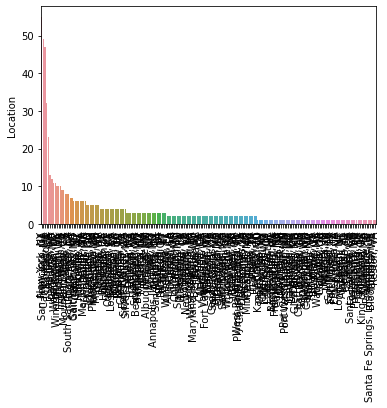

graph for Headquarters: total = 198


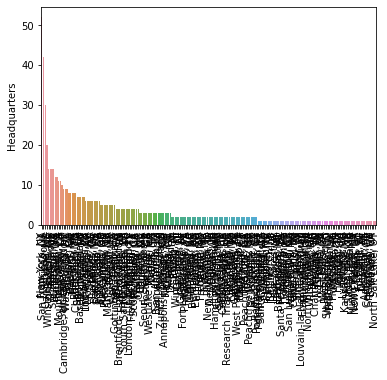

graph for Size: total = 9


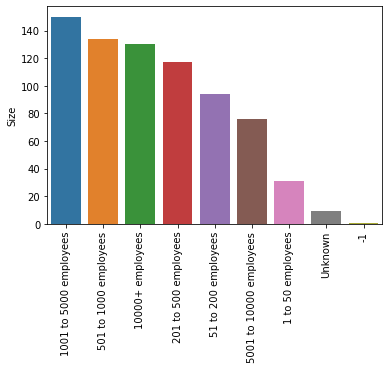

graph for Type of ownership: total = 11


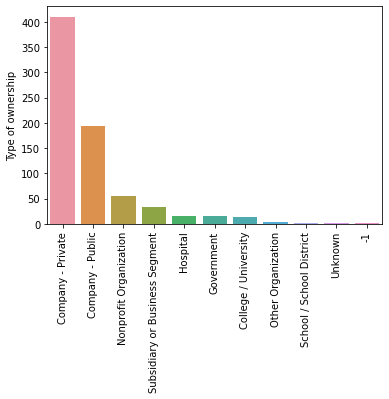

graph for Industry: total = 60


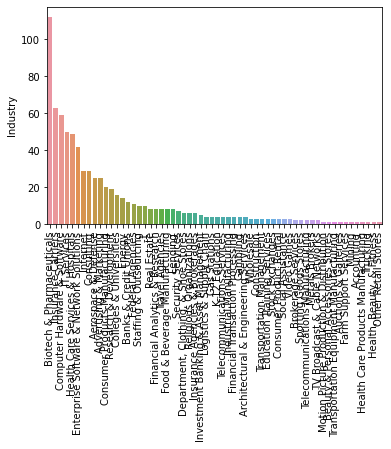

graph for Sector: total = 25


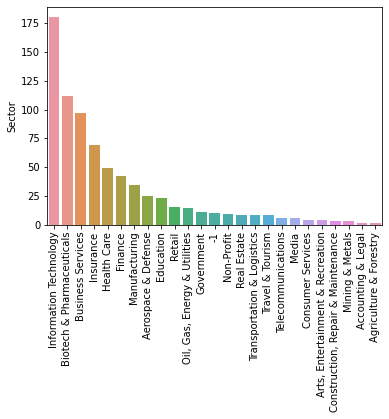

graph for Revenue: total = 14


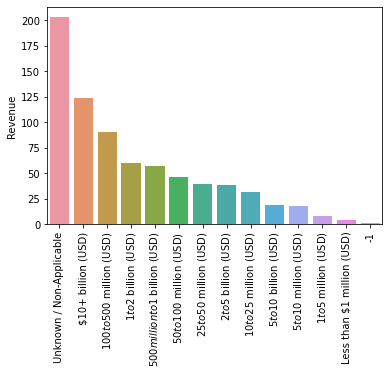

graph for Company: total = 343


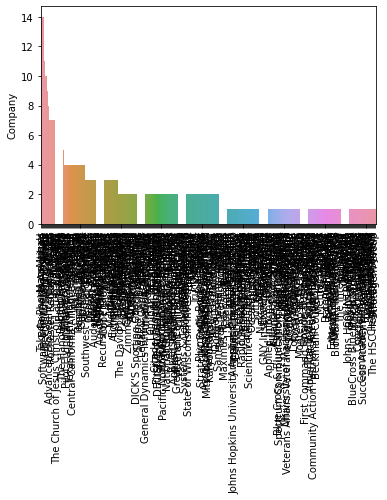

graph for State: total = 37


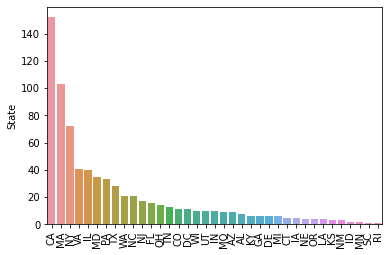

graph for In-HQ_State: total = 2


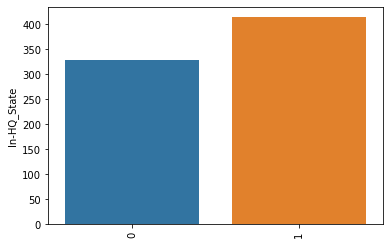

graph for Python: total = 2


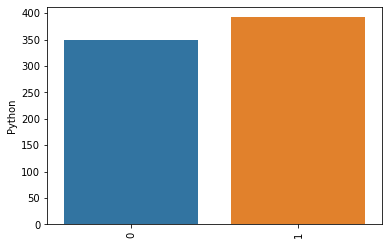

graph for R: total = 2


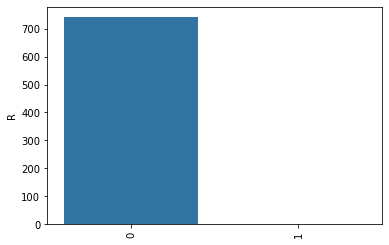

graph for Spark: total = 2


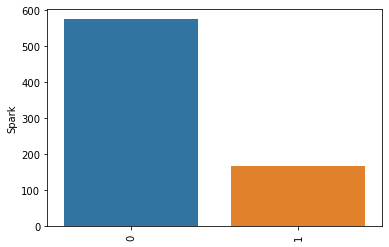

graph for AWS: total = 2


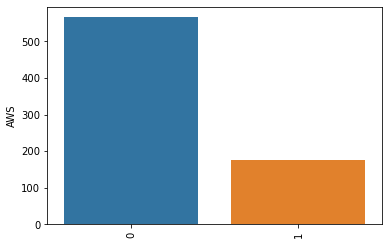

graph for Excel: total = 2


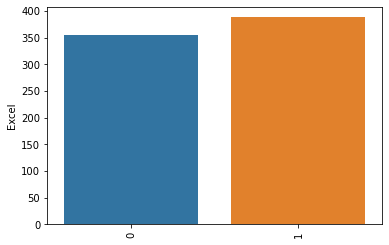

graph for Job Type: total = 7


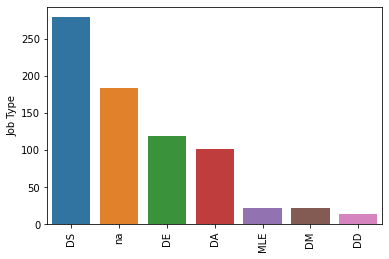

graph for Job Level: total = 3


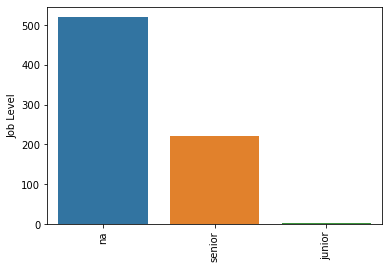

In [39]:
for i in df_categorical.columns:
    cat_count = df_categorical[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_count)))
    chart = sns.barplot(x=cat_count.index, y=cat_count)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


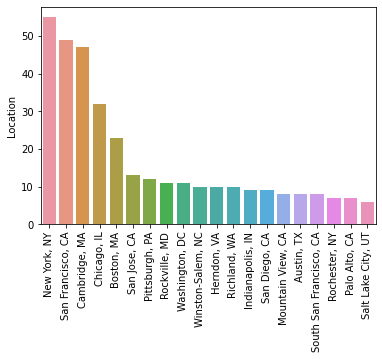

graph for Headquarters: total = 20


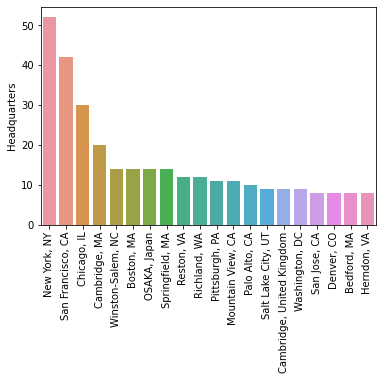

graph for Company: total = 20


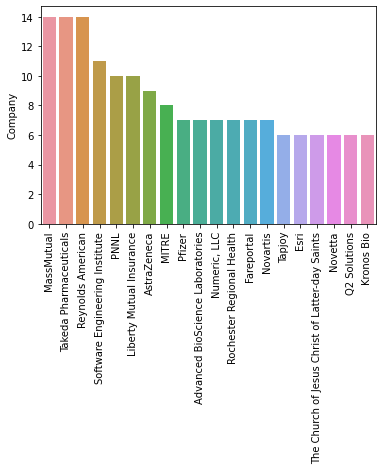

In [40]:
for i in df_categorical[['Location','Headquarters','Company']].columns:
    cat_count = df_categorical[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_count)))
    chart = sns.barplot(x=cat_count.index, y=cat_count)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [41]:
pd.pivot_table(df, index = 'Job Type', values = 'avg_salary')

,avg_salary
Job Type,
DA,65.857843
DD,168.607143
DE,105.403361
DM,84.022727
DS,117.564516
MLE,126.431818
na,84.853261


In [42]:
pd.pivot_table(df, index = ['Job Type', 'Job Level'], values = 'avg_salary')

avg_salary
Job Type Job Level            
DA       junior      56.500000
         na          61.155405
         senior      79.092593
DD       na         168.607143
DE       na          96.701220
         senior     124.689189
DM       na          84.022727
DS       junior     106.500000
         na         107.043011
         senior     138.956522
MLE      na         119.133333
         senior     142.071429
na       na          73.988189
         senior     109.061404

In [45]:
pd.pivot_table(df, index = ['State'], values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
State,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [46]:
pd.pivot_table(df, index = ['State','Job Type'], values = 'avg_salary').sort_values('State', ascending = False)

avg_salary
State Job Type            
WI    na         54.000000
      DS        113.500000
      DA         58.833333
WA    na         97.500000
      DS         99.764706
...                    ...
AZ    DA         55.000000
      na        124.500000
AL    na         43.750000
      DE         65.000000
      DA         62.200000

[114 rows x 1 columns]

In [47]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [48]:
pd.pivot_table(df, index = ['State','Job Type'], values = 'avg_salary', aggfunc = 'count').sort_values('State', ascending = False)

avg_salary
State Job Type            
WI    na                 4
      DS                 3
      DA                 3
WA    na                 1
      DS                17
      DA                 3
VA    na                 5
      MLE                2
      DS                18
      DE                10
      DA                 6
UT    DE                 3
      DA                 4
      DS                 3
TX    na                 7
      DS                13
      DE                 8
TN    DS                 1
      DE                10
      DA                 2
SC    na                 1
RI    DA                 1
PA    DS                 6
      DE                 1
      DM                 3
      DA                 8
      MLE                7
      na                 8
OR    DS                 3
      DE                 1
OH    na                 3
      DS                 7
      DA                 4
NY    na                12
      MLE                2
      DS                40
      DE                 4
      DA                14
NM    DS                 3
NJ    DE                 2
      DA                 6
      DD                 2
      DS                 4
      DM                 2
      na                 1
NE    na                 4
NC    na                12
      DS                 3
      DE                 6
MO    na                 3
      DS                 3
      DM                 1
      DA                 2
MN    DE                 1
      DA                 1
MI    DS                 4
      DM                 2
MD    na                16
      DS                13
      DE                 3
      DA                 3
MA    na                46
      DS                30
      DM                 5
      DE                12
      DD                 6
      DA                 4
LA    DA                 1
      DE                 2
      na                 1
KY    na                 4
      DS                 2
KS    MLE                3
IN    na                 4
      DS                 2
      DE                 4
IL    DA                 3
      na                 6
      MLE                2
      DS                15
      DE                 8
      DD                 6
ID    DA                 2
IA    DA                 2
      DE                 3
GA    DS                 3
      na                 3
FL    DS                 7
      DE                 3
      DA                 6
DE    na                 6
DC    DS                 5
      DE                 4
      DA                 2
CT    na                 3
      DS                 2
CO    MLE                1
      DE                 3
      DA                 1
      na                 3
      DS                 3
CA    na                27
      MLE                5
      DS                68
      DM                 9
      DE                25
      DA                18
AZ    DS                 1
      DE                 5
      DA                 1
      na                 2
AL    na                 2
      DE                 1
      DA                 5

In [49]:
pd.pivot_table(df[df['Job Type'] == 'DS'], index = 'State', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
State,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [50]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'Competitors_count', 'hourly', 'employer_provided', 'Python', 'R', 'Spark', 'AWS', 'Excel', 'Type of ownership','avg_salary']]

In [52]:
for i in df_pivots.columns:
    if i!= 'avg_salary':
        print(i)
        print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

In [54]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'Python', values = 'avg_salary', aggfunc = 'count')

Python,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0
